# Contents

1. Imports
2. Load File
3. Barplot  
    3.1. Set color  
    3.2. Custom labels  
      3.2.1. `generation_id`  
      3.2.2. `type_1`  
      3.2.3. Rotate labels  
      3.2.4. Horizontal plot  
    3.3. Absolute vs. Relative Frequency  
    3.4. Absolute frequency  
    3.5. Relative Frequency  
    3.6. Counting missing values  

### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. Load file

In [2]:
df = pd.read_csv('pokemon.csv')

In [4]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [4]:
df2 = pd.read_csv('fuel-econ.csv')
df2.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### 3. Barplot

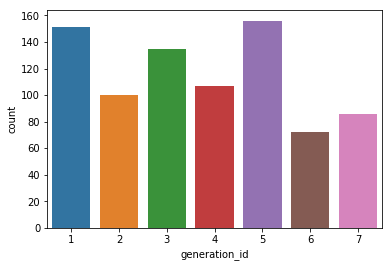

In [7]:
sns.countplot(data=df,x='generation_id');

### 3.1. Set color

In [9]:
base_color = sns.color_palette()[0]

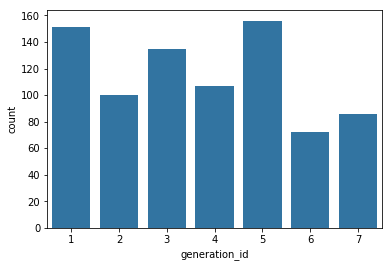

In [10]:
sns.countplot(data=df,x='generation_id',color=base_color);

### 3.2. Custom labels

### 3.2.1. `generation_id`

In [13]:
gen_order = df['generation_id'].value_counts().index

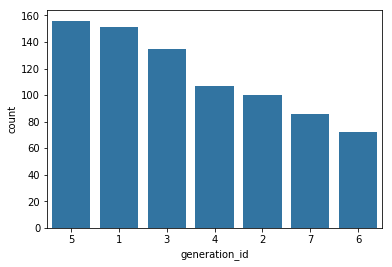

In [14]:
sns.countplot(data=df,x='generation_id',color=base_color,order=gen_order);

### 3.2.2. `type_1`

In [17]:
type_order = df['type_1'].value_counts().index

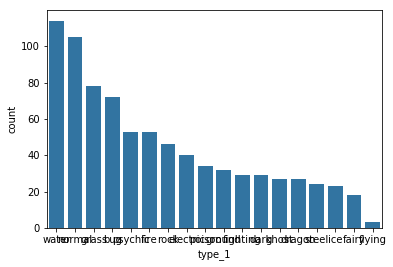

In [18]:
sns.countplot(data=df,x='type_1',color=base_color,order=type_order);

### 3.2.3. Rotate labels

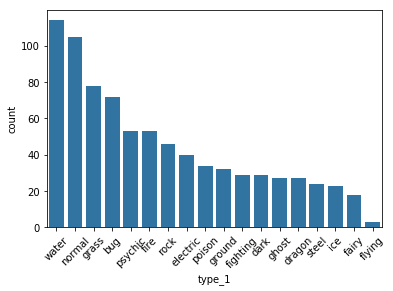

In [22]:
sns.countplot(data=df,x='type_1',color=base_color,order=type_order);
plt.xticks(rotation=45);

### 3.2.4 Horizontal plot

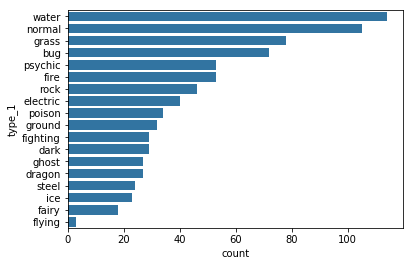

In [23]:
sns.countplot(data=df,y='type_1',color=base_color,order=type_order);

### 3.3. Absolute vs. Relative Frequency

### 3.3.1. Absolute frequency

In [28]:
pokemon_type = df.melt(id_vars=['id','species'],value_vars=['type_1','type_2'],var_name='type_level',value_name='type').dropna()

In [31]:
pokemon_type.tail()

,id,species,type_level,type
1607,801,magearna,type_2,fairy
1608,802,marshadow,type_2,ghost
1610,804,naganadel,type_2,dragon
1611,805,stakataka,type_2,steel
1612,806,blacephalon,type_2,ghost


In [32]:
type_counts = pokemon_type['type'].value_counts()
type_order = type_counts.index

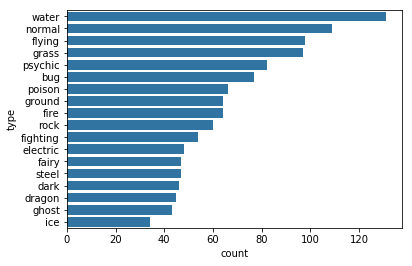

In [37]:
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon_type,y='type',color=base_color,order=type_order);

### 3.3.2. Relative Frequency

In [39]:
n_pokemon = df.shape[0]
max_type_count = type_counts[0]
max_proportion = max_type_count/n_pokemon
print(max_proportion)

0.1623296158612144


In [41]:
tick_prop = np.arange(0,max_proportion,0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_prop]

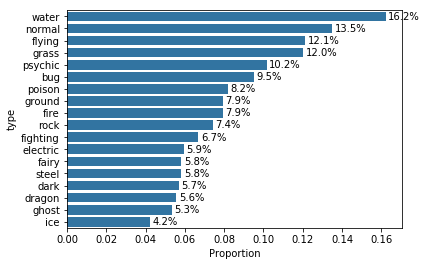

In [56]:
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon_type,y='type',color=base_color,order=type_order);
plt.xticks(tick_prop * n_pokemon,tick_names);
plt.xlabel('Proportion')

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1,i,pct_string,va='center')

### 3.6. Counting missing data

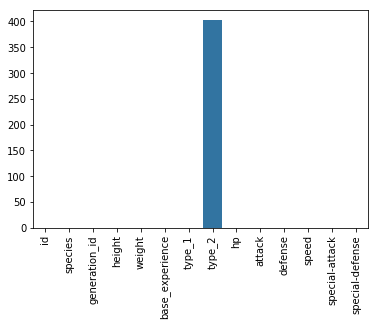

In [14]:
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation=90);

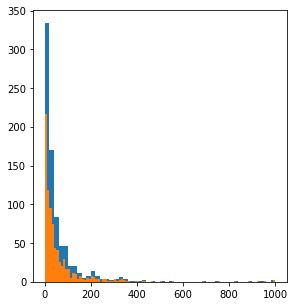

In [32]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['weight'].max()+4, 20)
plt.hist(data = df, x = 'weight', bins = bin_edges);

# example of somewhat too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['weight'].max()+1/4, 10)
plt.hist(data = df, x = 'weight', bins = bin_edges);

### 4. Scatterplots

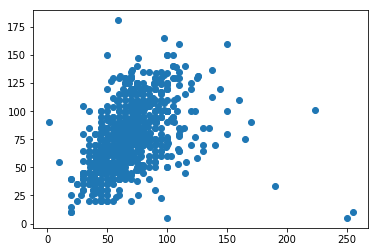

In [3]:
plt.scatter(data = df, x = 'hp', y = 'attack')

### 4.1 Scatter plot with regression line

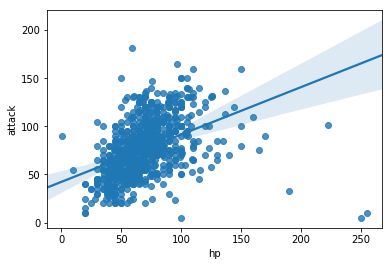

In [5]:
sns.regplot(data = df, x = 'hp', y = 'attack')

### 4.2. Scatter plot with variable transformation

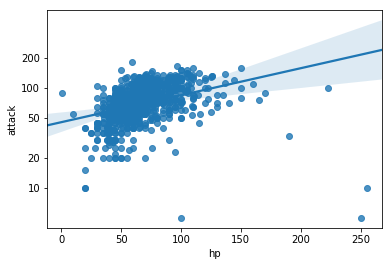

In [8]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(df['hp'], df['attack'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200]
plt.yticks(log_trans(tick_locs), tick_locs);

### 4.3. Overplotting, Transparency, and Jitter

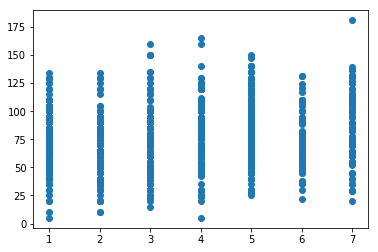

In [10]:
plt.scatter(data = df, x = 'generation_id', y = 'attack')

### 4.3.1.  Apply alpha and jitter

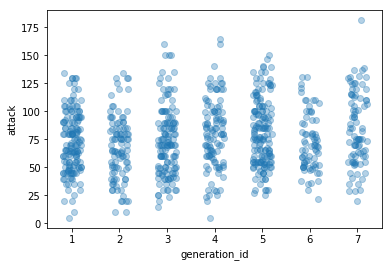

In [12]:
sns.regplot(data = df, x = 'generation_id', y = 'attack', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

### 5. Heatmap

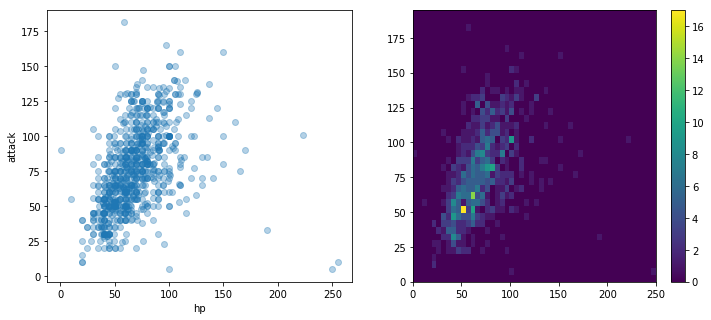

In [16]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'hp', y = 'attack', fit_reg = False,# remove regression line
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 255, 5)
bins_y = np.arange(0, 200, 5)
plt.hist2d(data = df, x = 'hp', y = 'attack',
           bins = [bins_x, bins_y])
plt.colorbar();


### 5.1 Heatmap Aditional Variations

> cmap = 'viridis_r', cmin = 0.5

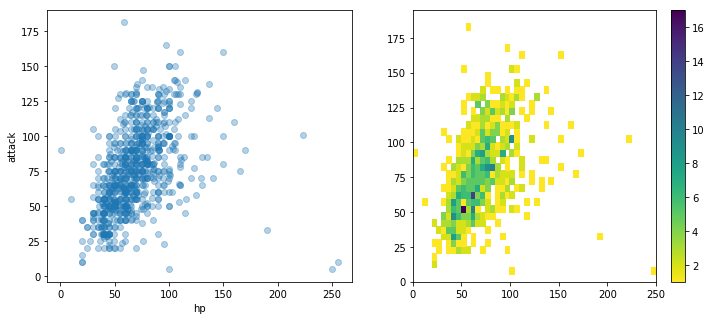

In [17]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'hp', y = 'attack', fit_reg = False,# remove regression line
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 255, 5)
bins_y = np.arange(0, 200, 5)
plt.hist2d(data = df, x = 'hp', y = 'attack',
           bins = [bins_x, bins_y],cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();


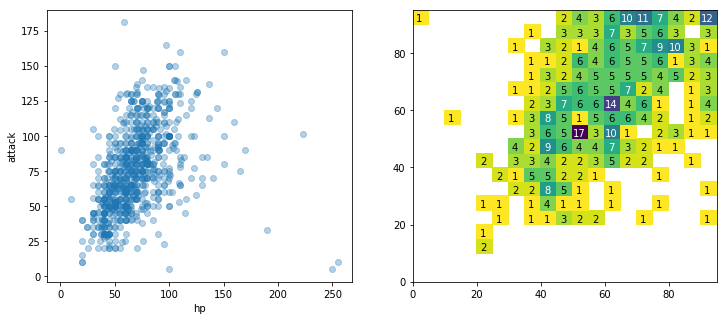

In [26]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'hp', y = 'attack', fit_reg = False,# remove regression line
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0, 100, 5)
bins_y = np.arange(0, 100, 5)
h2d = plt.hist2d(data = df, x = 'hp', y = 'attack',
           bins = [bins_x, bins_y],cmap = 'viridis_r', cmin = 0.5)

counts = h2d[0]

increment_space = 2

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+increment_space, bins_y[j]+increment_space, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+increment_space, bins_y[j]+increment_space, int(c),
                     ha = 'center', va = 'center', color = 'black')


### 6. Violin plot

> With `inner` equal `None`

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

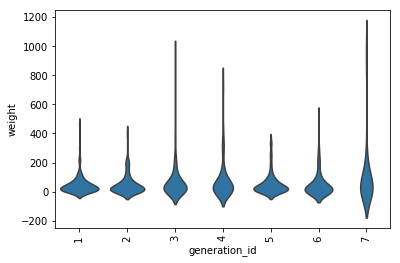

In [11]:
sns.violinplot(data=df,x='generation_id',y='weight',color= sns.color_palette()[0],
              inner=None)
plt.xticks(rotation=90)

> With `inner` equal `quartile`

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

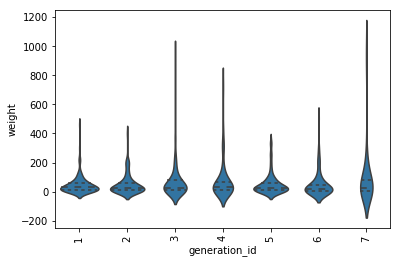

In [8]:
sns.violinplot(data=df,x='generation_id',y='weight',color= sns.color_palette()[0],
              inner='quartile')
plt.xticks(rotation=90)

### 7. Boxplot

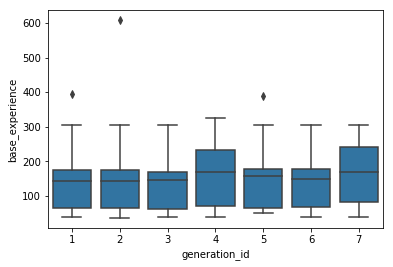

In [12]:
sns.boxplot(data=df,x='generation_id',y='base_experience',color= sns.color_palette()[0])

### 8. Clustered Barplot

In [4]:
df2.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [7]:
df2['trans_type'] = df2['trans'].apply(lambda text: text.split(' ')[0])

In [16]:
ct_counts = df2.groupby(['VClass','trans_type']).size()

In [17]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='VClass',columns='trans_type',values='count')

### 8.1. Comparation between heatmap and clustered barplot

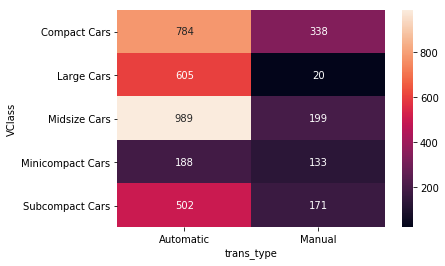

In [20]:
sns.heatmap(ct_counts,annot=True,fmt='d')

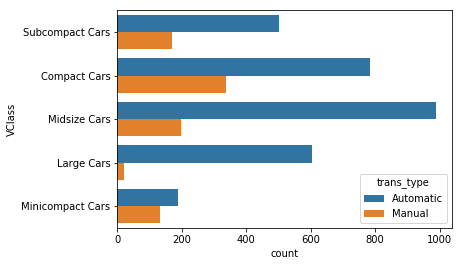

In [25]:
sns.countplot(data=df2,y='VClass',hue='trans_type')
#plt.xticks(rotation='45')

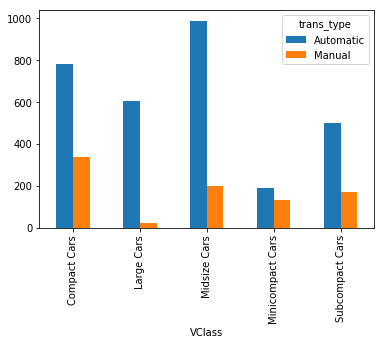

In [28]:
ct_counts.plot.bar()

### 9. Faceting

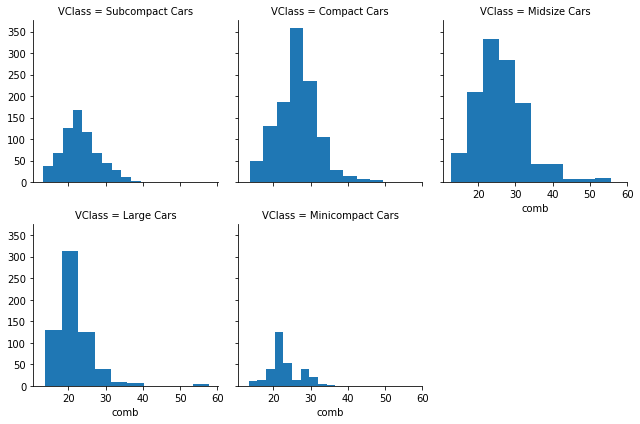

In [32]:
bins = np.arange(12,60,2)
g = sns.FacetGrid(data=df2,col='VClass',col_wrap=3);
g.map(plt.hist,'comb')

> `sharey`=`False`

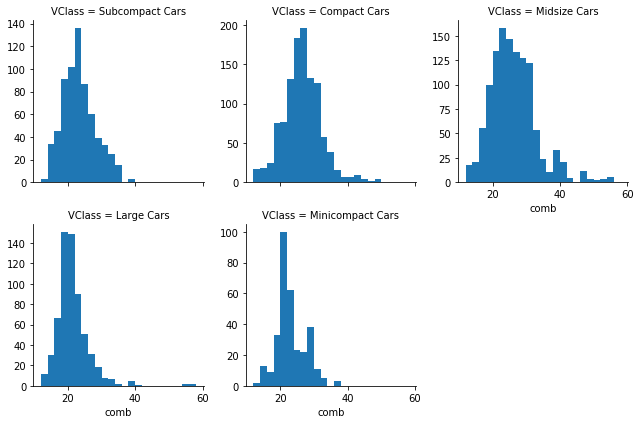

In [35]:
bins = np.arange(12,60,2)
g = sns.FacetGrid(data=df2,col='VClass',col_wrap=3,sharey=False);
g.map(plt.hist,'comb',bins=bins)

### 10. Adaptation of Univariate Plots

- The adaptation of univariate plots is used to plot 2 variables on barplot.

- Use this a barplot to plot a mean of variable `weight` in each `generation_id`. This if allowed by `seaborn` function.

Text(0, 0.5, 'Weight Means')

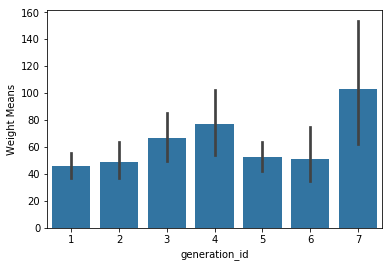

In [40]:
sns.barplot(data = df, x = 'generation_id', y = 'weight', color = sns.color_palette()[0])
plt.ylabel('Weight Means')

- The pointplot show a statistic e a confidence interval (standard desviation) represented by a line.

> `linestyles`

Text(0, 0.5, 'Weight Means')

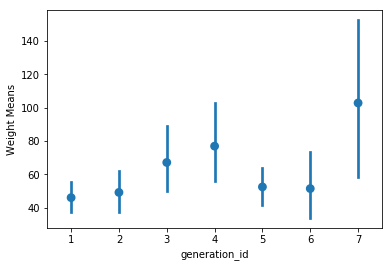

In [42]:
sns.pointplot(data = df, x = 'generation_id', y = 'weight', color = sns.color_palette()[0],linestyles = "")
plt.ylabel('Weight Means')

### 11. Line Plots

Text(0, 0.5, 'Avg. Combined Fuel Eff. (mpq)')

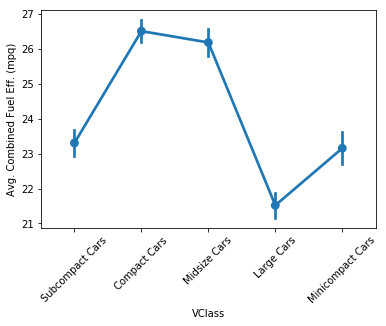

In [43]:
sns.pointplot(data = df2, x = 'VClass', y = 'comb')
plt.xticks(rotation=45)
plt.ylabel('Avg. Combined Fuel Eff. (mpq)')

- Erro bar

In [44]:
bins_e = np.arange(0.6,7.2,0.2)
bins_c = bins_e[:-1]+0.1

display_binned = pd.cut(df2['displ'],bins_e, include_lowest=True)

In [47]:
comb_mean = df2['comb'].groupby(display_binned).mean()

In [64]:
comb_mean = np.array(comb_mean,dtype='float64')

<ErrorbarContainer object of 3 artists>

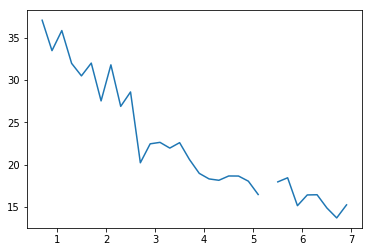

In [65]:
plt.errorbar(x=bins_c,y=comb_mean)

- With standard desviation

In [66]:
comb_std = df2['comb'].groupby(display_binned).std()

<ErrorbarContainer object of 3 artists>

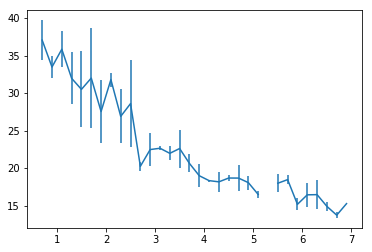

In [67]:
plt.errorbar(x=bins_c,y=comb_mean,yerr=comb_std)

### 11.1. Alternate Variations

In [104]:
string_var = 'highway'
df_window = df2.sort_values(string_var).rolling(15)
x_winmean =df2.sort_values(string_var)[string_var].rolling(15).mean()
y_median = df2.sort_values(string_var)[string_var].rolling(15).median()
y_q1 = df2.sort_values(string_var)[string_var].rolling(15).quantile(.25)
y_q3 = df2.sort_values(string_var)[string_var].rolling(15).quantile(.75)

Text(0, 0.5, 'num_var2')

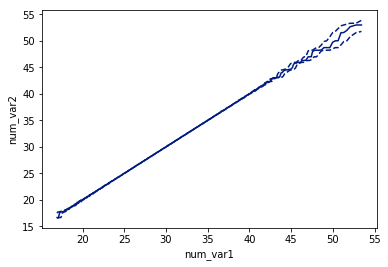

In [105]:
base_color = sns.color_palette()[0]
line_color = sns.color_palette('dark')[0]
#plt.scatter(data = df2, x = 'num_var1', y = 'num_var2')
plt.errorbar(x = x_winmean, y = y_median, c = line_color)
plt.errorbar(x = x_winmean, y = y_q1, c = line_color, linestyle = '--')
plt.errorbar(x = x_winmean, y = y_q3, c = line_color, linestyle = '--')

plt.xlabel('num_var1')
plt.ylabel('num_var2')

### 12. Rug and Strip Plots

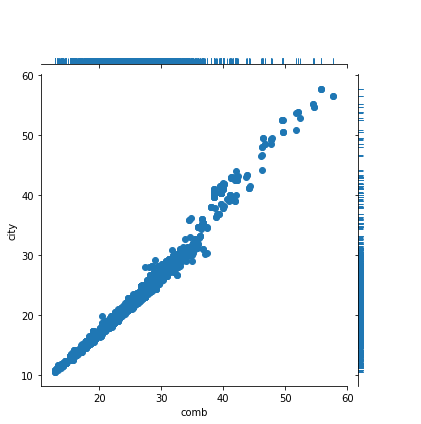

In [153]:
g = sns.JointGrid(data = df2, x = 'comb', y = 'city')
g.plot_joint(plt.scatter)
g.plot_marginals(sns.rugplot, height = 0.1)

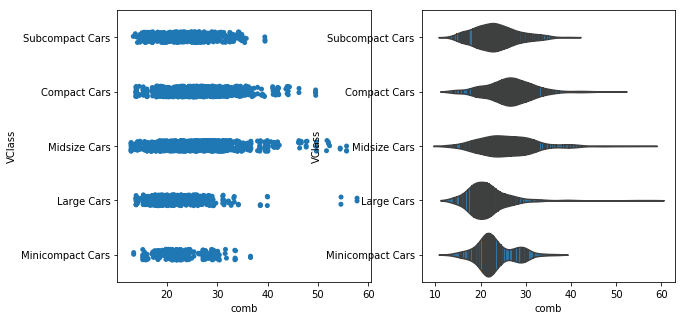

In [156]:
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sns.stripplot(data = df2, y = 'VClass', x = 'comb',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sns.violinplot(data = df2, y = 'VClass', x = 'comb', color = base_color,
             inner = 'stick')

### 13. Non-Positional Encodings for Third Variables

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
-  numeric variable and two categorical variables
- three categorical variables

In [6]:
df2.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [9]:
np.random.seed(2018)
sample = np.random.choice(df2.shape[0],200,replace=False)
df2_subset = df2.loc[sample]

### 13.1. Encoding via Shape

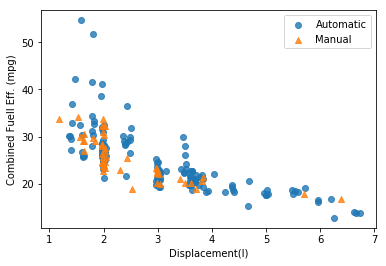

In [14]:
ttype_markers = [['Automatic','o'],['Manual','^']]

for ttype,marker in ttype_markers:
    plot_data = df2_subset.loc[df2['trans_type'] == ttype]
    sns.regplot(data=plot_data,x='displ',y='comb',x_jitter=0.04,fit_reg=False,marker = marker)
    
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuell Eff. (mpg)');
plt.legend(['Automatic','Manual']);

- FacetGrid

### 13.2. Encoding via Size

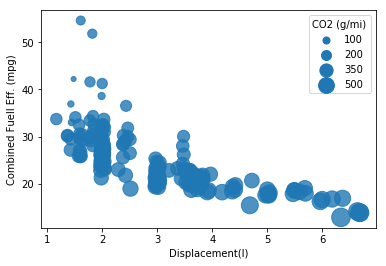

In [32]:
sns.regplot(data=df2_subset,x='displ',y='comb',x_jitter=0.04,fit_reg=False,
           scatter_kws={'s':df2_subset['co2']/2})
    
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuell Eff. (mpg)');

sizes = [100,200,350,500]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s/2,color=sns.color_palette()[0]))
    
plt.legend(legend_obj,sizes,title='CO2 (g/mi)')

### 14. Color Palette

- Qualitative palette: 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- Sequential palette: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
- Diverging palette: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

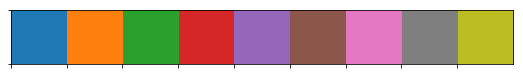

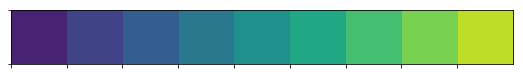

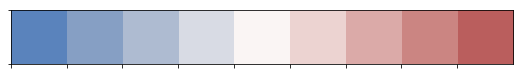

In [58]:
sns.palplot(sns.color_palette(n_colors=9))
sns.palplot(sns.color_palette('viridis', 9))
sns.palplot(sns.color_palette('vlag', 9))

### 14.1. Qualitative palette for Categorical variables

- Example with transmission type

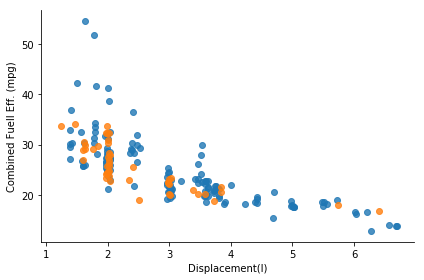

In [37]:
g = sns.FacetGrid(data=df2_subset, hue='trans_type',hue_order=['Automatic','Manual'],
                 height=4,aspect=1.5)
g = g.map(sns.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuell Eff. (mpg)');

- Example with vehicle type

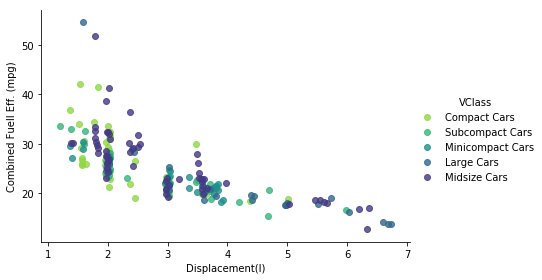

In [40]:
g = sns.FacetGrid(data=df2_subset, hue='VClass',
                 height=4,aspect=1.5, palette='viridis_r')
g = g.map(sns.regplot,'displ','comb',x_jitter=0.04,fit_reg=False)
g.add_legend()
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuell Eff. (mpg)');

### 14.2. For numerical variables

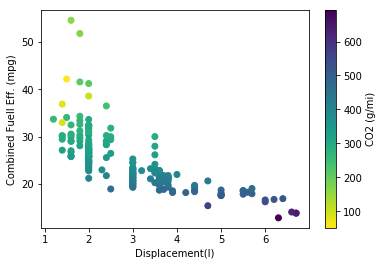

In [44]:
plt.scatter(data=df2_subset,x='displ',y='comb', c='co2',cmap='viridis_r')
plt.colorbar(label='CO2 (g/mi)')
plt.xlabel('Displacement(l)')
plt.ylabel('Combined Fuell Eff. (mpg)');

### 14.3. Warnings on color

- consider color blindness
- avoid overlap, because this change the color in the area e result into miss identification

### 15. Faceting for Multivariate Data

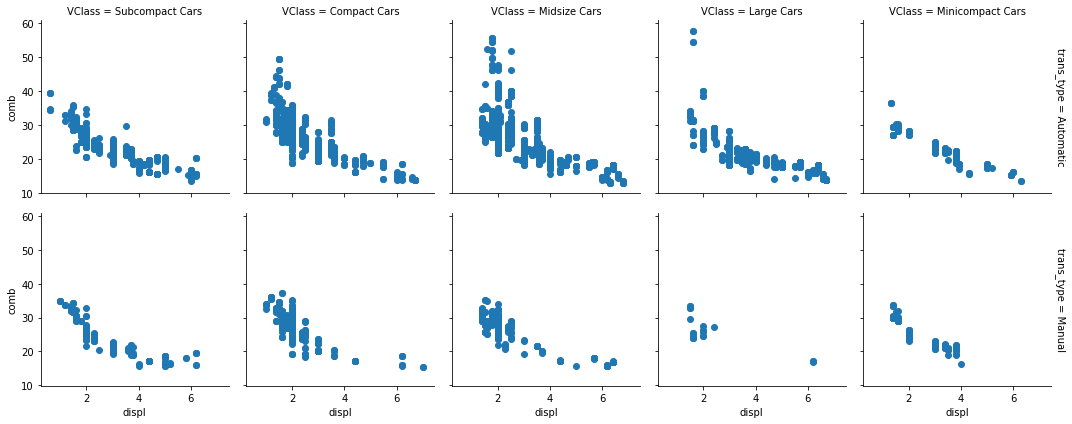

In [63]:
g = sns.FacetGrid(data=df2,col='VClass',row='trans_type',margin_titles=True)
g.map(plt.scatter,'displ','comb')

### 16. Other Adaptations of Bivariate Plots

Text(0, 0.5, 'Comb Means')

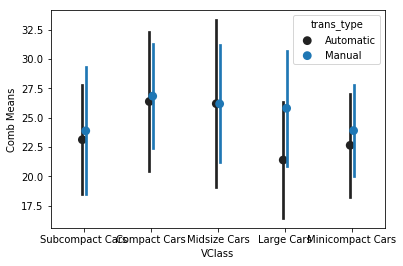

In [72]:
sns.pointplot(data = df2, x='VClass', y='comb',hue='trans_type', color=sns.color_palette()[0],
              ci='sd',dodge=True,linestyles = "")
plt.ylabel('Comb Means')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

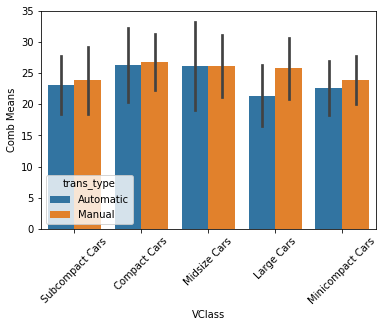

In [71]:
sns.barplot(data = df2, x='VClass', y='comb',hue='trans_type',
              ci='sd')
plt.ylabel('Comb Means')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

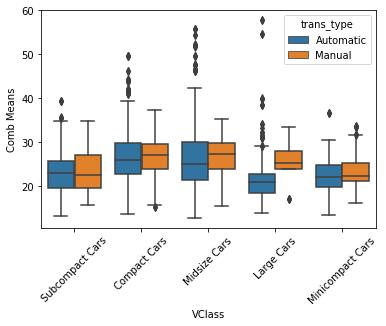

In [74]:
sns.boxplot(data = df2, x='VClass', y='comb',hue='trans_type')
plt.ylabel('Comb Means')
plt.xticks(rotation=45)

- Heatmap based on third variable mean.

In [77]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y = np.arange(12,58+3,3)

In [80]:
displ_bins = pd.cut(df2['displ'],bins_x,right=False,include_lowest=False,labels=False).astype(int)
comb_bins = pd.cut(df2['comb'],bins_y,right=False,include_lowest=False,labels=False).astype(int)

In [84]:
n_points = df2.groupby([displ_bins,comb_bins]).size()
n_points = n_points.reset_index().pivot(index='displ',columns='comb').values

In [86]:
co2_weights = df2['co2']/n_points[displ_bins,comb_bins]

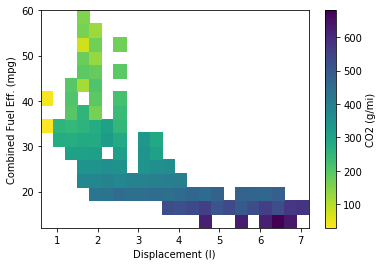

In [90]:
plt.hist2d(data=df2,x='displ',y='comb',cmin=0.5,
          cmap='viridis_r',bins=[bins_x,bins_y],weights=co2_weights);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)')

### 17. PairGrid

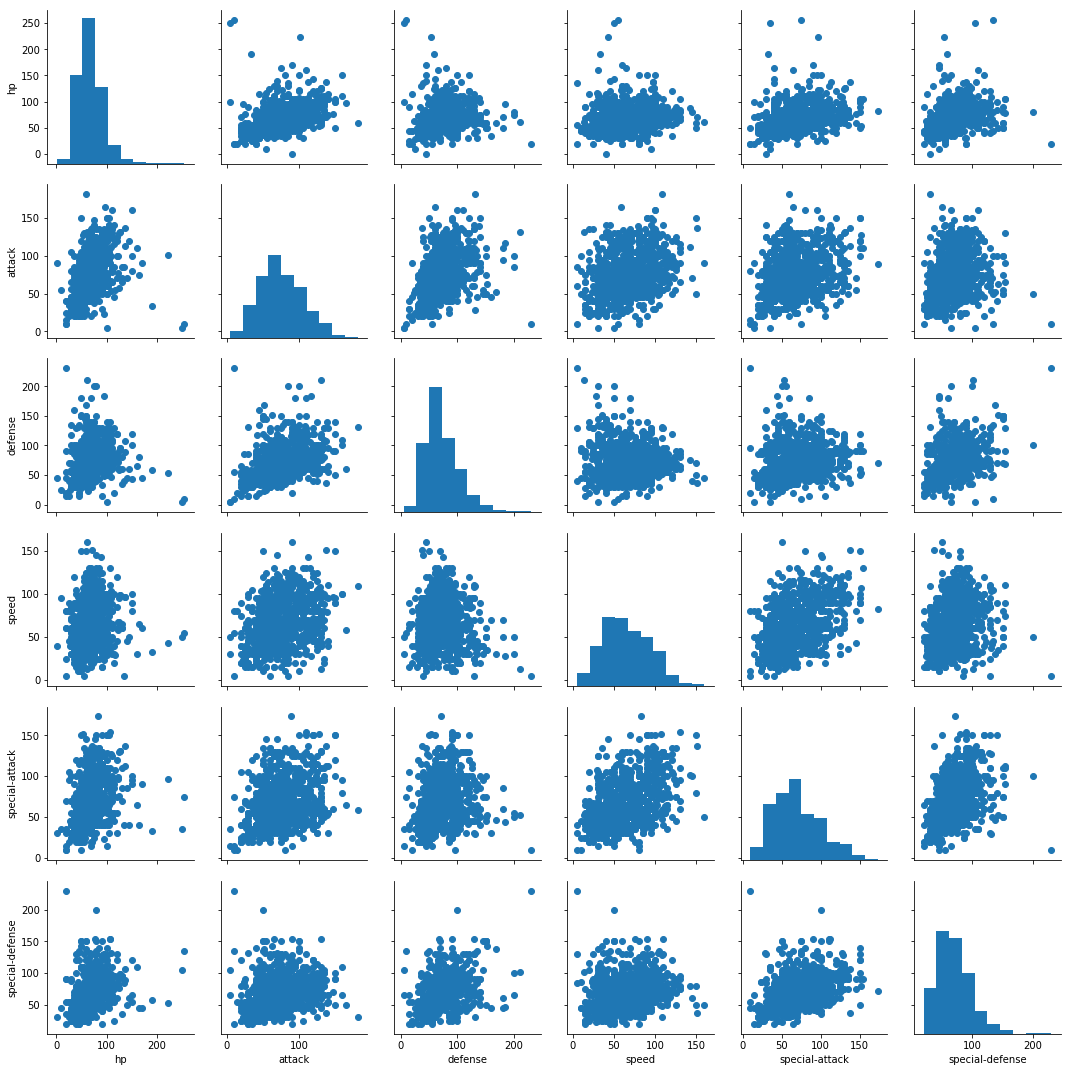

In [95]:
pkm_stats = ['hp','attack','defense','speed','special-attack','special-defense']
g = sns.PairGrid(data=df,vars=pkm_stats)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

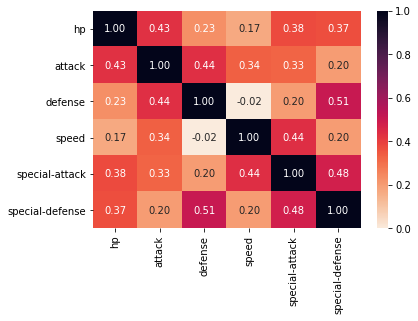

In [105]:
sns.heatmap(df[pkm_stats].corr(),cmap='rocket_r',annot=True,fmt='.2f',vmin=0)

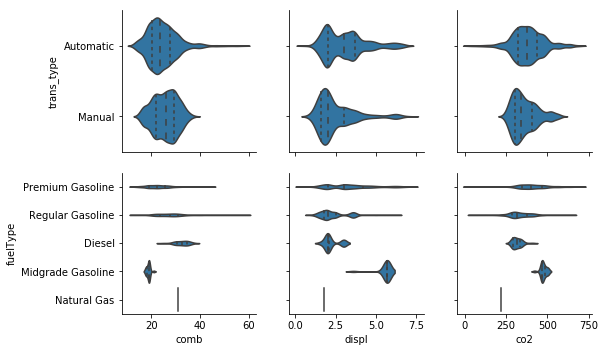

In [110]:
g = sns.PairGrid(data = df2, x_vars = ['comb','displ','co2'],
                y_vars = ['trans_type','fuelType'])
g.map(sns.violinplot, inner = 'quartile')